*************Model Defined **************
Status: Optimal
Optimal Value: 254.0
Z_('batch1',_'batch2',_1,_1,_1) = 1.0
Z_('batch1',_'batch2',_2,_2,_2) = 1.0
Z_('batch1',_'batch3',_1,_1,_1) = 1.0
Z_('batch1',_'batch3',_2,_2,_2) = 1.0
Z_('batch1',_'batch3',_3,_3,_3) = 1.0
Z_('batch2',_'batch3',_1,_1,_1) = 1.0
Z_('batch2',_'batch3',_2,_2,_2) = 1.0
x_('batch1',_1,_'machine1',_1) = 1.0
x_('batch1',_1,_'machine1',_2) = 1.0
x_('batch1',_1,_'machine1',_3) = 1.0
x_('batch1',_2,_'machine2',_4) = 1.0
x_('batch1',_2,_'machine2',_5) = 1.0
x_('batch1',_2,_'machine2',_6) = 1.0
x_('batch1',_2,_'machine2',_7) = 1.0
x_('batch1',_3,_'machine3',_8) = 1.0
x_('batch1',_3,_'machine3',_9) = 1.0
x_('batch2',_1,_'machine1',_6) = 1.0
x_('batch2',_1,_'machine1',_7) = 1.0
x_('batch2',_1,_'machine1',_8) = 1.0
x_('batch2',_2,_'machine2',_10) = 1.0
x_('batch2',_2,_'machine2',_11) = 1.0
x_('batch2',_2,_'machine2',_12) = 1.0
x_('batch2',_2,_'machine2',_13) = 1.0
x_('batch3',_1,_'machine1',_11) = 1.0
x_('batch3',_1,_'mach

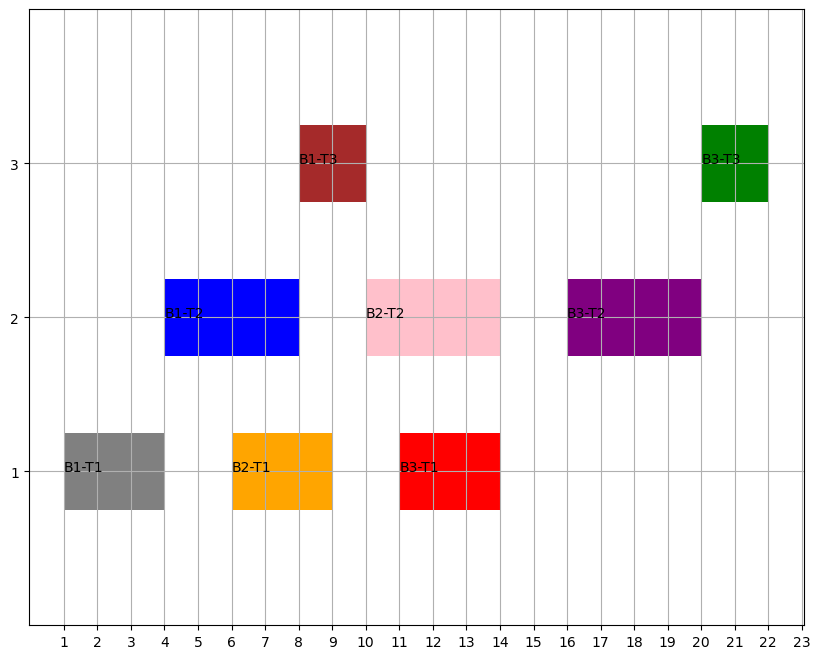

    machine   task  start  finish         Time Slot
0  machine1  B1-T1      1       4         [1, 2, 3]
3  machine1  B2-T1      6       9         [6, 7, 8]
5  machine1  B3-T1     11      14      [11, 12, 13]
1  machine2  B1-T2      4       8      [4, 5, 6, 7]
4  machine2  B2-T2     10      14  [10, 11, 12, 13]
6  machine2  B3-T2     16      20  [16, 17, 18, 19]
2  machine3  B1-T3      8      10            [8, 9]
7  machine3  B3-T3     20      22          [20, 21]
Status: Optimal
Optimal Value: 254.0


In [19]:

'''
import pickle
with open('C:/Users/Omid/Desktop/input_repr_dict.pkl', 'rb') as f:
  input_repr_dict = pickle.load(f)
  
J = input_repr_dict["J"]
M = input_repr_dict["M"]
compat = input_repr_dict["compat"]
'''
# =============================================================================
#                    Reading Data and defining example
# =============================================================================
T = range(1, 24)  # Time horizon: 1 to 336
J = ['batch1', 'batch2', 'batch3']  # Example batch set
K = { 'batch1': [1, 2, 3], 'batch2': [1, 2] , 'batch3': [1, 2, 3] }  # Example task sequences
'''
compat= {'batch1': [["machine1","machine2"],["machine1","machine2"],["machine1","machine2"]],
         'batch2': [["machine2","machine3"],["machine2","machine3"],["machine2","machine3"]],
         'batch3': [["machine1","machine3"],["machine1","machine3"],["machine1","machine3"]]}
compat= {'batch1': [["machine1"],["machine1"],["machine1"]],
         'batch2': [["machine1","machine2"],["machine1","machine2"],["machine1","machine2"]],
         'batch3': [["machine3"],["machine2","machine3"],["machine1"]]}
'''
compat= {'batch1': [["machine1","machine2"],["machine2","machine3"],["machine1"]],
         'batch2': [["machine1","machine2"],["machine2","machine3"]],
         'batch3': [["machine1","machine2"],["machine2","machine3"],["machine1"]]}

compat= {'batch1': [["machine1"],["machine2"],["machine3"]],
         'batch2': [["machine1"],["machine2"]],
         'batch3': [["machine1"],["machine2"],["machine3"]]}

M = { 1: ['machine1'], 2: ['machine2'], 3: ['machine3']}  # Example machine sets
d = { ('batch1', 1): 3, ('batch1', 2): 4, ('batch1', 3): 2,
      ('batch2', 1): 3, ('batch2', 2): 4, 
      ('batch3', 1): 3, ('batch3', 2): 4, ('batch3', 3): 2}  # Example durations

Type = { ('batch1', 1): "Type1", ('batch1', 2): "Type1", ('batch1', 3): "Type1",
         ('batch2', 1): "Type2", ('batch2', 2): "Type2", 
         ('batch3', 1): "Type3", ('batch3', 2): "Type3", ('batch3', 3): "Type3"}  # task's type


f = { 'batch1': 100, 'batch2': 100 ,'batch3': 100 }  # Example promised delivery times
S= 2 # Setup time


# =============================================================================
#                    New Very small example
# =============================================================================
'''
T = range(1, 10)  # Time horizon: 1 to 336
J = ['batch1', 'batch2']  # Example batch set
K = { 'batch1': [1,2], 'batch2': [1 , 2] }  # Example task sequences

compat= {'batch1': [["machine1"],["machine2"]],
         'batch2': [["machine1"],["machine2"]]}

M = { 1: ['machine1'], 2: ['machine2']}  # Example machine sets
d = { ('batch1', 1): 2, ('batch1', 2): 1,
      ('batch2', 1): 1, ('batch2', 2): 2}  # Example durations
f = { 'batch1': 10, 'batch2': 10 }  # Example promised delivery times
S= 2 # Setup time
'''
# =============================================================================
#                                define Model
# =============================================================================
   
import pulp
# ===========================
#     -- Variables --
# ===========================
y = pulp.LpVariable.dicts("y", ((j, k, M[m][0], t) for j in J for k in K[j] for m in M for t in T if (M[m][0] in compat[j][k-1] and t<= len(T)- d[j, k]+1)), 0, 1, pulp.LpBinary)
x = pulp.LpVariable.dicts("x", ((j, k, M[m][0], t) for j in J for k in K[j] for m in M for t in T if M[m][0] in compat[j][k-1]), 0, 1, pulp.LpBinary)

# Problem definition
prob = pulp.LpProblem("SchedulingProblem", pulp.LpMaximize)
# ===========================
#     -- Objective --
# =========================== 
prob.setObjective( sum(f[j] for j in J) - sum( (t+d[j, K[j][-1]]) * y[j, K[j][-1], M[m][0], t]  for j in J for m in M for t in T if (j, K[j][-1], M[m][0], t) in y.keys()))
# print(prob.objective)

# =========================== 
# -- Constraints -- 
# ===========================
Cons1=[]
# Each task in each batch starts once and only on one machine
for j in J:
    for k in K[j]:
        Cons1.append(pulp.lpSum(y[j, k, M[m][0], t] for m in M for t in T if (j, k, M[m][0], t) in y.keys()) == 1)
        prob += Cons1[-1]

Cons2=[]
# A task only occupies a machine for the duration of processing time if the task is set to start on said machine
for j in J:
    for k in K[j]:
        for m in M:
            for t in T:
                if (j, k, M[m][0], t) in y.keys():
                    # Ensuring x values correspond correctly with the y start times
                    for t_prime in range(t, t + d[j, k]):
                        if (j, k, M[m][0], t_prime) in x.keys():
                            Cons2.append(x[j, k, M[m][0], t_prime] >= y[j, k, M[m][0], t])
                            prob += Cons2[-1]

Cons3=[]
# Total time the task occupies the machines equals the processing duration
for j in J:
    for k in K[j]:
        Cons3.append(pulp.lpSum(x[j, k, M[m][0], t] for m in M for t in T if (j, k, M[m][0], t) in x.keys()) == d[j, k])
        prob+=Cons3[-1]
           
Cons4=[]
# Only one machine can be used at a time
for t in T:
    for m in M:
        Cons4.append(pulp.lpSum(x[j, k, M[m][0], t] for j in J for k in K[j] if (j, k, M[m][0], t) in x.keys()) <= 1)
        prob+=Cons4[-1]

Cons5=[]
# Tasks must be done in the order specified by the batch
for j in J:
    for k in K[j]:
        if  k!=K[j][-1] :
            kp=K[j].index(k)+1
            Cons5.append(pulp.lpSum(t*y[j, k, M[m][0], t] for m in M for t in T if (j, k, M[m][0], t) in y.keys()) + d[j, k] <=
                         pulp.lpSum(t * y[j, K[j][kp], M[m][0], t] for m in M for t in T if (j, K[j][kp], M[m][0], t) in y.keys()))

            prob+=Cons5[-1]

# prob+= y["batch1", 1, "machine1", 4]==1

Z = pulp.LpVariable.dicts("Z", ((j , jp , k , kp , m) for j in J for jp in J for k in K[j] for kp in K[jp] for m in M if jp!=j if (j, k, M[m][0], T[0]) in y.keys() if (jp, kp, M[m][0], T[0]) in y.keys()),cat='Binary')

Cons6=[]

# Tasks must be done in the order specified by the batch
for j in J:
    for k in K[j]:
        for m in M:
            for jp in J:
                if jp != j:
                    for kp in K[jp]:
                        if k==kp and Type[j,k] != Type[jp,kp] and (j, k, M[m][0], T[0]) in y.keys() and (jp, kp, M[m][0], T[0]) in y.keys():
                            # print([ j , jp , k , kp , m])
                            Cons6.append(pulp.lpSum(t*y[j, k, M[m][0], t] for t in T if (j, k, M[m][0], t) in y.keys())
                                       - pulp.lpSum(t*y[jp, kp, M[m][0], t] for t in T if (jp, kp, M[m][0], t) in y.keys())>=
                                       (d[jp, kp] + S ) * ( pulp.lpSum(y[j, k, M[m][0], t] for t in T if (j, k, M[m][0], t) in y.keys()) - pulp.lpSum(y[jp, kp, M[mp][0], t] for t in T for mp in M if mp != m if (jp, kp, M[mp][0], t) in y.keys()) )
                                       -Z[ j , jp , k , kp , m]* len (T))

                            prob+=Cons6[-1]
            
Cons7=[]

# Tasks must be done in the order specified by the batch
for j in J:
    for k in K[j]:
        for m in M:
            for jp in J:
                if jp != j:
                    for kp in K[jp]:
                        if k==kp and Type[j,k] != Type[jp,kp] and (j, k, M[m][0], T[0]) in y.keys() and (jp, kp, M[m][0], T[0]) in y.keys():
                            Cons7.append(pulp.lpSum(- t*y[j, k, M[m][0], t] for t in T if (j, k, M[m][0], t) in y.keys())
                                       + pulp.lpSum(t*y[jp, kp, M[m][0], t] for t in T if (jp, kp, M[m][0], t) in y.keys())>=
                                       (d[j, k] + S ) * ( pulp.lpSum(y[j, k, M[m][0], t] for t in T if (j, k, M[m][0], t) in y.keys()) - pulp.lpSum(y[jp, kp, M[mp][0], t] for t in T for mp in M if mp != m if (jp, kp, M[mp][0], t) in y.keys()) )
                                       -(1-Z[ j , jp , k , kp , m]) * len (T))
            
                            prob+=Cons7[-1]
                          

# Solve the problem
print ("*************Model Defined **************")
# prob.solve()
#pulp.GUROBI(msg=1).solve(prob)
prob.solve(pulp.GUROBI_CMD())
print("Status:", pulp.LpStatus[prob.status])

# Print the optimal value of the objective function
print("Optimal Value:", pulp.value(prob.objective))

# Print the results
# '''
for v in prob.variables():
    if v.varValue > 0.01: #and v.name.startswith('x') :
        print(f"{v.name} = {v.varValue}")
# '''

# =================================================
#  -- Converting optimal solution to table --
# =================================================
Data=[]
for v in prob.variables():
    if v.varValue > 0.01 and v.name.startswith('y') :
        v=v.name.split(",")
        Duration=d[(v[0].split("(")[1][1:-1],int(v[1][1:]))]
        Data.append([v[2][2:-1],f"B{v[0][-2]}-T{v[1][1:]}",int(v[3][1:-1]),int(v[3][1:-1])+Duration])
        Time_Slot=[]
        for vp in prob.variables():
            if vp.varValue > 0.01 and vp.name.startswith('x') :
                vp=vp.name.split(",")
                if (v[2][2:-1],v[0].split("(")[1][1:-1],int(v[1][1:]))==(vp[2][2:-1],vp[0].split("(")[1][1:-1],int(vp[1][1:])):
                    Time_Slot.append(int(vp[3][1:-1]))
        Data[-1].append(Time_Slot)
                
# =================================================
#  -- Plot Gant chart for given solution --
# =================================================                
def Gant_Chart(Data):
    import pandas as pd
    mydata=pd.DataFrame(Data,columns=["machine","task" , "start" , "finish","Time Slot"])
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(10, 8))
    
    AllColors=[]
    import matplotlib.colors as mcolors
    for i in mcolors.TABLEAU_COLORS.keys():
        AllColors.append(i[4:])
       
    machines = set(list(mydata["machine"]))
    tasks = list(set(list(mydata["task"])))

    NM = len(machines) # Number of machines
    NM=max(list (int(i[-1]) for i in machines))
    for i in machines:
        for index, row in mydata.iterrows():
            stdur = [] # list of tuples (start, duration)
            if row["machine"] == i:
                start = (row["start"])
                duration = (row["finish"] -  row["start"])
            
                stdur.append((start,duration))
                ax.annotate(row["task"], (start,int(i[-1])))
                ax.broken_barh(stdur, (int(i[-1])-0.25, 0.5), facecolors=(AllColors[tasks.index(row["task"])]))
           
    ax.set_ylim(0, NM+1)
    ax.set_yticks(range(1,NM+1))
    ax.set_xticks(T)
    ax.grid(True)
    
    plt.savefig('C:/Users/Omid/Desktop')
    plt.show()
    return mydata

Data=Gant_Chart(Data)
Data=Data.sort_values("machine")
print(Data)
print("Status:", pulp.LpStatus[prob.status])
print("Optimal Value:", pulp.value(prob.objective))
